# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Stats 101 - hypothesis testing
Week 2 | Lesson 1.2



### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Define null vs alternative hypotheses 
- Explain significance levels
- Explain ways of calculating p-values

### The p-value

$P(Data | H_0)$

The **p-value** is the probability that, **GIVEN THE NULL HYPOTHESIS IS TRUE**, we would have the current set of data. 



### Multiple ways to think about hypothesis testing

The p-value is $P(Data | H_0)$. If this probability is very low, below some *significance level* cut-off, then we "reject" the null hypothesis. Otherwise we fail to reject it.

There is a rich body of inferential statistics that allows us to calculate this analytically using *parametric methods*, i.e. given certain assumptions. This is the traditional way of doing hypothesis tests.

If we have a model of $H_0$, we can sometimes also *calculate this directly* with simulations.

So we have two broad strategies for testing hypotheses:

Simulation-based:
- Describe null and alternative hypotheses
- Set significance level alpha
- Define model
- Run simulation
- Calculate p-value
- Compare p-value to alpha

![](./assets/images/Hypothesistestingfigure.png)
_Image from http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html_

Parametric methods:
- Describe null and alternative hypotheses
- Set significance level alpha
- Define distribution
- Calculate test statistic
- Calculate p-value
- Compare p-value to alpha

### Guided practice: hypothesis testing for coin flips

Let's say we want to test whether a coin is rigged to turn up more heads when flipping. What's our null hypothesis? How would we simulate this?

```python
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
trials = 100000.
data = np.random.randint(2, size = (trials,30)) # as we increase the sample size, we approach a normal distribution
N = np.sum(data, axis = 1) # sum up the number of heads in rows (experiments)
plt.hist(N)
```

/Users/timothyernst/anaconda/envs/Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(array([  1.00000000e+01,   2.46000000e+02,   1.86800000e+03,
          1.59090000e+04,   2.47100000e+04,   2.80870000e+04,
          2.41550000e+04,   4.22300000e+03,   7.33000000e+02,
          5.90000000e+01]),
 array([  3. ,   5.3,   7.6,   9.9,  12.2,  14.5,  16.8,  19.1,  21.4,
         23.7,  26. ]),
 <a list of 10 Patch objects>)

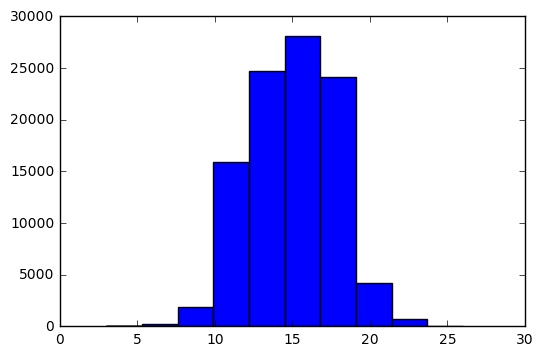

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
trials = 100000.
data = np.random.randint(2, size = (trials,30)) # as we increase the sample size, we approach a normal distribution
N = np.sum(data, axis = 1) # sum up the number of heads in rows (experiments)
plt.hist(N)

Let's say we flipped our real-life coin 30 times, and saw 20 heads. What is the probability of this given $H_0$, which we model as a fair coin? We can use our simulation and simply count the proportion of times we observed a result at least as large as the one we're interested in.

First, let's pick an $\alpha$ (significance) level: at what point do we say a result is improbable enough that we won't believe it happened in a world where $H_0$ is true?

$$\alpha = ?$$


In [16]:
alpha = .05
pval = sum(N >= 20) / trials
print pval, alpha, pval > alpha

# This gives ~5% chance, just above our alpha level

0.05015 0.05 True


Do we reject or fail to reject the null hypothesis?

## Demonstration: parametric methods for hypothesis testing

More traditionally, we could define our assumptions about the model and its distribution, and pick an appropriate *test statistic*.

Here, we could use a binomial proportions test statistic. For a largeish number of trials, this gives us a "Z-score" which lies on a normal distribution.

$$ \frac{\hat{p} - p_0}{\sqrt{p_0 (1 - p_0) / n}} $$


In [113]:
import scipy.stats as st
test_stat = (20./30 - 15./30) / np.sqrt(.5* (1-.5) / 30.)
((1 - st.norm.cdf(test_stat))) *2 # two-tailed


0.067889154861829004

### Demo: More hypothesis testing with parametric method

Say we are testing a new drug:

- We randomly select 50 people to be in the placebo control condition and 50 people to recieve the treatment.
- Our sample is selected from the broader, unknown population pool.
- In a parallel world we could have ended up with any random sample from the population pool of 100 people.


### The "null hypothesis"

What is it?

The null hypothesis is, in this example, the hypothesis that there is no difference between placebo and treatment.

**H0:** The measured parameter is equal to a specific value for the population.

The **alternative hypothesis** is the other possible outcome of the experiment: the difference between the placebo and the treatment is real/not zero.

**H1:** The measured parameter is different for the population than the value in the null hypothesis.

Say in our experiment we follow-up with the experimental and control groups:

- 5 out of 50 patients in the control group indicate that their symptoms are better
- 20 out of 50 patients in the experimental group indicate that their symptoms are better

The **p-value** would be the **probability we have this data if the effect of the drug is in fact no better than placebo.**

Let's visuailze this degree of difference, assuming observed differences over many trials are normally distributed.

In [17]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize": (9, 7)})

null_dist = np.random.normal(0, 5, 100)
measured_diff = 15. 

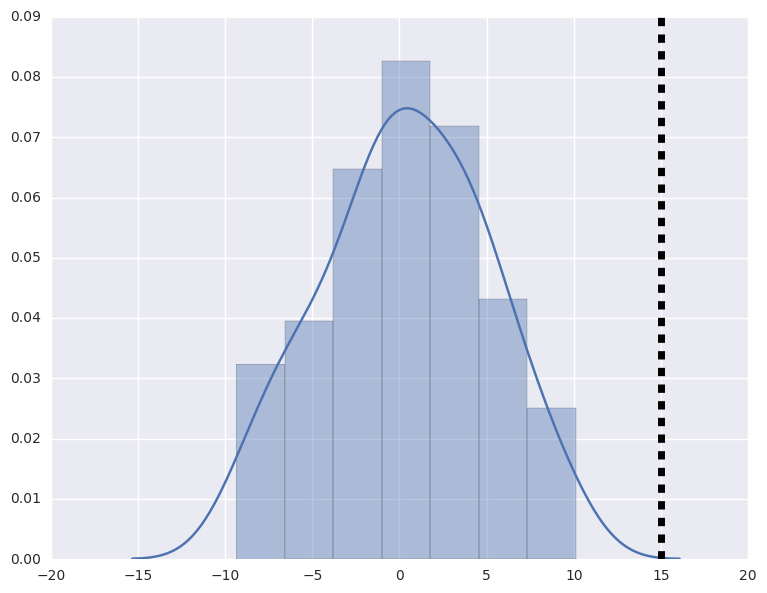

In [18]:
ax = sns.distplot(null_dist)
ax.axvline(measured_diff, color='k', linestyle='--', lw=5)

### t-tests: calculating the p-value

How do we calculate the **p-value**? For comparing two means (as is the case in this example: the mean difference in symptoms between conditions) we can use the **t-test**.

The p-value is a conversion of the **t-statistic** calculated for our experiment.

<img src="http://sites.nicholas.duke.edu/statsreview/files/2013/09/tstat.jpg">

- The numerator: the difference between **the mean of your sample** and the **hypothesized mean**. Recall that our hypothesized mean is the **null hypothesis H0**

- The denominator: **the standard deviation of your sample measurements** divided by the **square root of your sample size**. 

### But what is the t-statistic?
<img src="http://sites.nicholas.duke.edu/statsreview/files/2013/09/tstat.jpg">

The t-statistic measures the **signal to noise ratio** in our data.

**The signal is our measured difference.** This is our measured mean minus the hypothesized mean **H0**.

**The noise** is the **variation in our data**. This is how much our measurements vary (measured by the standard deviation), with a penalty for smaller sample sizes (the square root of the sample size).

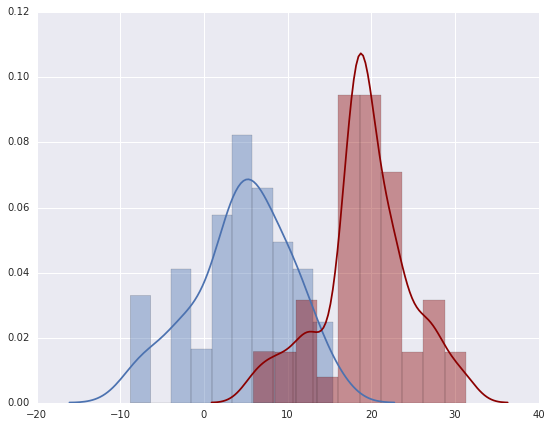

In [140]:
control = np.random.normal(5, 5, 50)
experimental = np.random.normal(20, 5, 50)
ax = sns.distplot(control, bins=10)
sns.distplot(experimental, color='darkred', bins=10, ax=ax)


We set the standard deviation to 5. What if it was higher? 

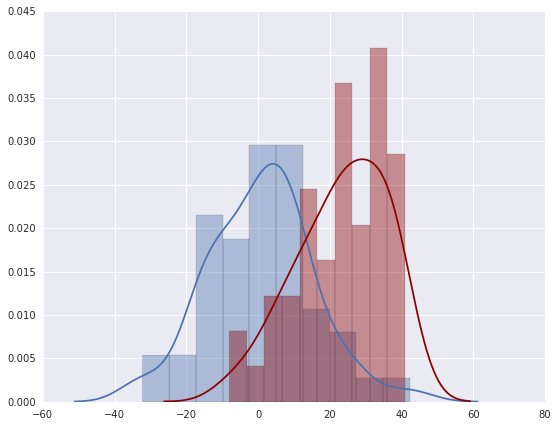

In [141]:
control = np.random.normal(5, 15, 50)
experimental = np.random.normal(20, 15, 50)

ax = sns.distplot(control, bins=10)
sns.distplot(experimental, color='darkred', bins=10, ax=ax)

The likelihood of seeing what we see under the null is in part determined by the underlying variation of the data.



Now, let's calculate the test-statistic:

(20 - 5) / (5 / np.sqrt(50))

<img src="http://sites.nicholas.duke.edu/statsreview/files/2013/09/tstat.jpg">

In [142]:
tt = (20 - 5) / (5 / np.sqrt(50))
pval = st.t.sf(np.abs(tt), 50-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print 't-statistic = %6.3f pvalue = %6.4f' % (tt, pval)


t-statistic = 21.213 pvalue = 0.0000
